In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/jupyter-masterclass/main/tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [3]:
# delete tweet id
df.drop(columns=['tweet_id'],inplace=True)
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
df.content.sample(5)

,content
12895,@bobbie_k_2k - Y!360 closing? get out!
6357,@MustBeBenHughes hahah! sadly there is no curr...
29490,Happy Mother's day to all beautiful mother. Ma...
18259,A little irked at the moment
8726,I miss having nothing to do except lay out bes...


In [5]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Preprocessing
- Lemmatization
- Stopwords removal
- removing numbers
- lower case conversion
- removing special characters
- removing URLs
- removing small_sentences

In [7]:
def remove_mention(text):
        match=re.findall(r"(@\s?[a-zA-Z0-9_]*\s?)",text)
        match=[i.strip() for i in match]
        return " ".join([i for i in text.split() if i not in match])


In [8]:
s_check=remove_mention(train_data.content[25658])
s_check

'good weather reminds me..I read your post on Sugar cane juice n other things..This weather calls for some of those things!'

In [9]:
# Only run these once to download required corpora
nltk.download('punkt')

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
from nltk.corpus import wordnet

In [12]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [13]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [17]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

def Lemmatize(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenize
    tokens = word_tokenize(text)#converts the sentence into tokens

    #POS tags
    pos_tags =pos_tag(tokens) #gives parts of speech tag to all the tokens

    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

    return " ".join(lemmatized)


In [18]:
s_check=Lemmatize(s_check)
s_check

'good weather remind me .. I read your post on Sugar cane juice n other thing .. This weather call for some of those thing !'

In [19]:
#removing stop wordss
def remove_stopWords(text):
    stop_words=stopwords.words('english')

    text=text.split()

    text=[word for word in text if word not in stop_words]
    return ' '.join(text)

In [20]:
remove_stopWords(s_check)

'good weather remind .. I read post Sugar cane juice n thing .. This weather call thing !'

In [21]:
#removing numbers
def remove_numbers(text):
    matches=re.findall(r"(\d)",text)
    text=''.join([i for i in text if i not in matches])
    return text

In [22]:
s_check_new=remove_numbers(train_data.content[33099])
s_check_new

'/ +full moon+ my lovely friends and family= my b-day wish came true;)&lt; In addition,gray matters is one of the cutest movies ever!!'

In [23]:
#lower case
def lower_case(text):
    text=str(text).lower()
    return text

In [24]:
s_check=s_check+s_check_new
s_check=lower_case(s_check)
s_check

'good weather remind me .. i read your post on sugar cane juice n other thing .. this weather call for some of those thing !/ +full moon+ my lovely friends and family= my b-day wish came true;)&lt; in addition,gray matters is one of the cutest movies ever!!'

In [25]:
#removing special chars and punctuations
def remove_punc(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

In [26]:
s_check=remove_punc(s_check)


In [27]:
s_check

'good weather remind me i read your post on sugar cane juice n other thing this weather call for some of those thing full moon my lovely friends and family my b day wish came true lt in addition gray matters is one of the cutest movies ever'

In [28]:
#removing urls
def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [29]:
removing_urls(train_data.content[27085])

'[Aeroplanes - We Know, Plato!] One of my favorite WKP songs!  ? '

In [30]:
#removing small sentences
def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
    return df

In [31]:
def normalize_text(df):
    df.content=df.content.apply(lambda content: remove_mention(content))
    df.content=df.content.apply(lambda content : lower_case(content))
    df.content=df.content.apply(lambda content : removing_urls(content))
    df.content=df.content.apply(lambda content : remove_stopWords(content))
    df.content=df.content.apply(lambda content : remove_numbers(content))
    df.content=df.content.apply(lambda content : remove_punc(content))
    df.content=df.content.apply(lambda content : Lemmatize(content))

    return df

In [32]:
train_data = normalize_text(train_data)
test_data = normalize_text(test_data)

In [33]:
train_data

,sentiment,content
14307,neutral,thundershower plus baseball equal awwww
17812,fun,hangover movie gon na hilarious wish could see...
11020,worry,play game leave work work til least pm tonight
15158,hate,stick work till freakin be madd suck work day
24990,surprise,u mean jack barakat s wow u ever go house hehe...
...,...,...
6265,neutral,cleaning
11284,hate,ooo goddddd vodafone trouble network
38158,fun,watch run fat boy run haha soo funny
860,hate,make pork product can fuck stop import dubai b...


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
train_data.sentiment.unique()

array(['neutral', 'fun', 'worry', 'hate', 'surprise', 'sadness', 'love',
       'happiness', 'relief', 'empty', 'enthusiasm', 'boredom', 'anger'],
      dtype=object)

In [36]:
encoder=LabelEncoder()
train_data.sentiment=encoder.fit_transform(train_data.sentiment)



In [37]:
test_data.sentiment=encoder.transform(test_data.sentiment)

In [38]:
train_data

,sentiment,content
14307,8,thundershower plus baseball equal awwww
17812,4,hangover movie gon na hilarious wish could see...
11020,12,play game leave work work til least pm tonight
15158,6,stick work till freakin be madd suck work day
24990,11,u mean jack barakat s wow u ever go house hehe...
...,...,...
6265,8,cleaning
11284,6,ooo goddddd vodafone trouble network
38158,4,watch run fat boy run haha soo funny
860,6,make pork product can fuck stop import dubai b...


In [39]:
X_train = train_data['content'].values
y_train = train_data['sentiment'].values

X_test = test_data['content'].values
y_test = test_data['sentiment'].values

In [40]:
vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train,)

X_test_bow = vectorizer.transform(X_test)

In [41]:
train_df = pd.DataFrame(X_train_bow.toarray())

train_df['label'] = y_train
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22906,22907,22908,22909,22910,22911,22912,22913,22914,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [42]:
train_df.shape

(32000, 22916)

In [43]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

In [ ]:
X =X_train_bow.astype(float)  # shape: (32000, 22916)
y = y_train   # Binary or multi-class labels

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr')
}


# Define models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100),
    'LightGBM': LGBMClassifier(n_estimators=100),
    'Linear SVC': LinearSVC(),
    'Naive Bayes': MultinomialNB()
}

results = []

# Evaluate each model
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=5, scoring=scoring, n_jobs=-1)
    results.append({
        'Model': name,
        'Accuracy': np.mean(scores['test_accuracy']),
        'Precision': np.mean(scores['test_precision']),
        'F1 Score': np.mean(scores['test_f1']),
        'ROC AUC': np.mean(scores['test_roc_auc'])
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by Accuracy and Precision
results_df = results_df.sort_values(by=['Accuracy', 'Precision'], ascending=False).reset_index(drop=True)

print(results_df)


                 Model  Accuracy  Precision  F1 Score  ROC AUC
0             LightGBM  0.352187   0.327142  0.319633      NaN
1              XGBoost  0.347844   0.336686  0.311548      NaN
2  Logistic Regression  0.335719   0.309576  0.310199      NaN
3          Naive Bayes  0.316844   0.280538  0.271050      NaN
4        Random Forest  0.316719   0.290268  0.289484      NaN
5           Linear SVC  0.293844   0.274686  0.281255      NaN


<Axes: ylabel='Frequency'>

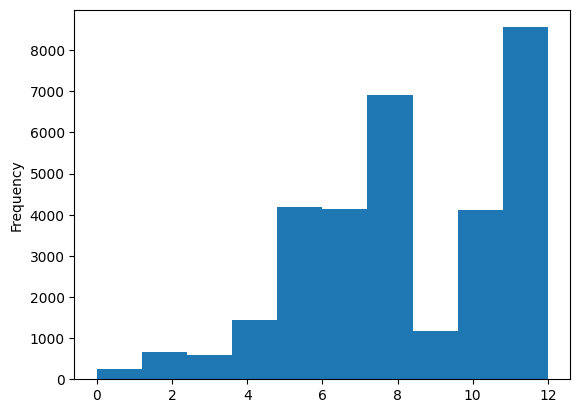

In [44]:
train_data.sentiment.plot(kind='hist')

<Axes: xlabel='sentiment'>

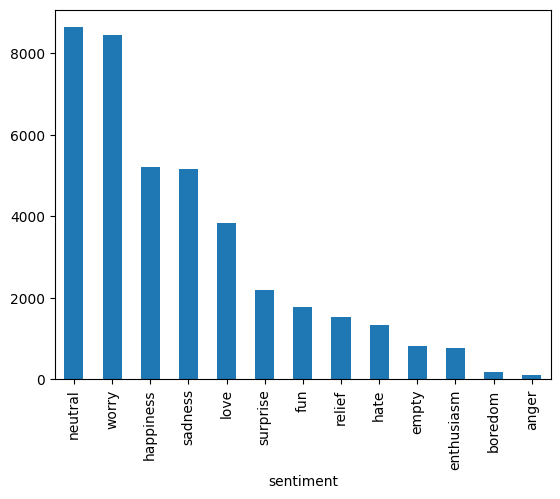

In [45]:
df['sentiment'].value_counts().plot(kind='bar')

In [47]:
y_train

array([ 8,  4, 12, ...,  4,  6,  7])

In [48]:
df.drop(index=df[df.sentiment=='neutral'].index,inplace=True)

<Axes: xlabel='sentiment'>

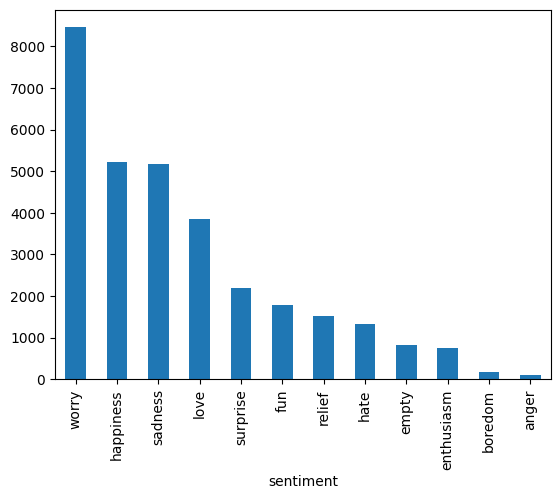

In [49]:
df['sentiment'].value_counts().plot(kind='bar')

In [50]:
len(df[df.sentiment=='worry'].sample(int(round(len(df[df.sentiment=='worry'])*0.58))))

4906

In [51]:
df.drop(index=df[df.sentiment=='worry'].sample(int(round(len(df[df.sentiment=='worry'])*0.42))).index ,inplace=True)

<Axes: xlabel='sentiment'>

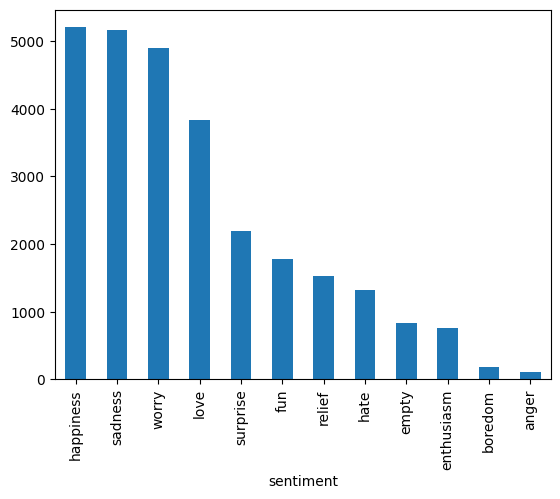

In [52]:
df['sentiment'].value_counts().plot(kind='bar')

In [53]:
df[(df.sentiment=='worry')|(df.sentiment=='happiness')]

,sentiment,content
5,worry,Re-pinging @ghostridah14: why didn't you go to...
7,worry,Hmmm. http://www.djhero.com/ is down
20,worry,@raaaaaaek oh too bad! I hope it gets better. ...
23,worry,I ate Something I don't know what it is... Why...
40,happiness,mmm much better day... so far! it's still quit...
...,...,...
39986,happiness,going to watch boy in the striped pj's hope i ...
39987,happiness,"gave the bikes a thorough wash, degrease it an..."
39988,happiness,"had SUCH and AMAZING time last night, McFly we..."
39994,happiness,Succesfully following Tayla!!


In [54]:
data=df[(df.sentiment=='happiness')| (df.sentiment=='sadness')]

<Axes: xlabel='sentiment'>

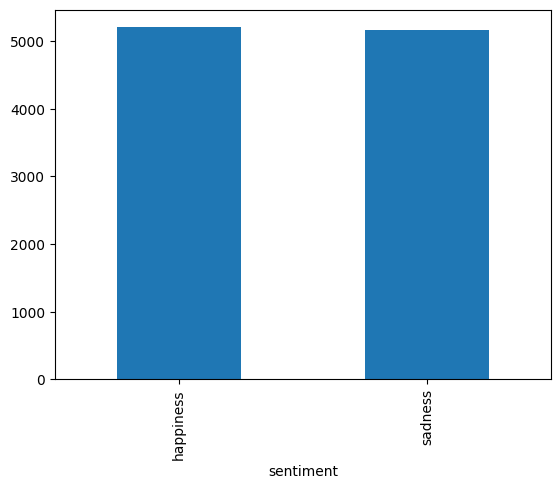

In [55]:
data.sentiment.value_counts().plot(kind='bar')

In [56]:
data=normalize_text(data)

In [57]:
X = data.iloc[:,-1]
y = data.loc[:,'sentiment']

In [ ]:
!pip install lightgbm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X.head()

,content
1,layin n bed headache ughhhh waitin call
2,funeral ceremony gloomy friday
5,re ping ghostridah go prom bc bf like friend
6,sleep im not think old friend want marry now damn amp want scandalous
8,charlene love miss


In [ ]:
y.head()

,sentiment
1,sadness
2,sadness
6,sadness
8,sadness
9,sadness


In [ ]:
# 2. Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# 3. TF-IDF Vectorization
bow = CountVectorizer()
X_bow = bow.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bow, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

In [ ]:
X_train=X_train.astype(float)
y_train=y_train.astype(float)
X_test=X_test.astype(float)
y_test=y_test.astype(float)

In [ ]:
# 5. Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

Training: Logistic Regression
Training: Random Forest
Training: Naive Bayes
Training: Linear SVC
Training: XGBoost
Training: LightGBM
[LightGBM] [Info] Number of positive: 4132, number of negative: 4167
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 8299, number of used features: 518
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497891 -> initscore=-0.008435
[LightGBM] [Info] Start training from score -0.008435
                 Model  Accuracy  Precision  F1 Score
0  Logistic Regression  0.790843   0.791127  0.790762
2          Naive Bayes  0.781205   0.781201  0.781202
5             LightGBM  0.775422   0.776921  0.775044
4              XGBoost  0.769157   0.770871  0.768863
1        Random Forest  0.769157   0.769

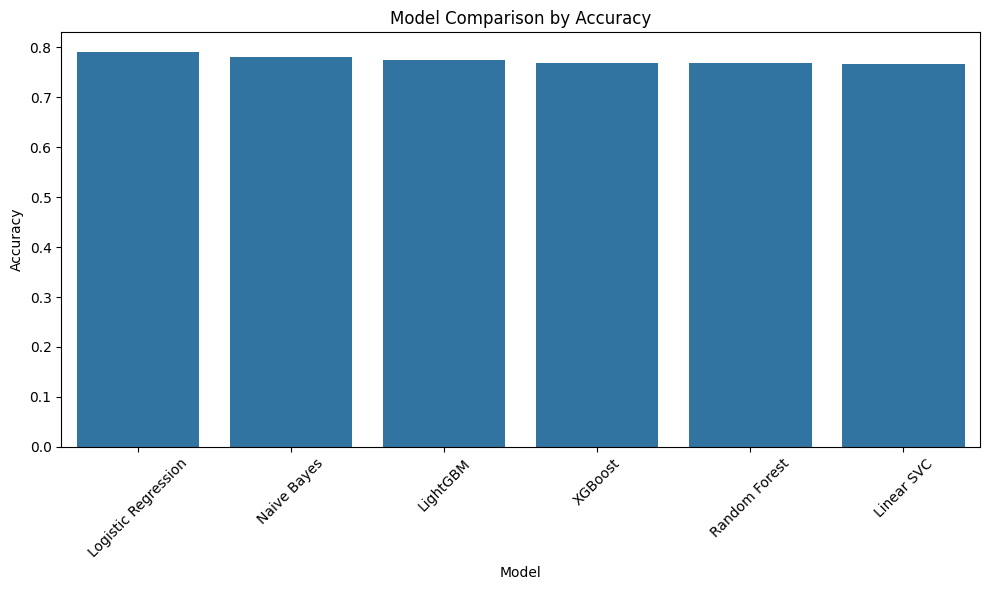

In [ ]:

# 6. Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier()
}

results = []

for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    })

# 7. Results DataFrame
results_df = pd.DataFrame(results).sort_values(by=['Accuracy', 'Precision'], ascending=False)
print(results_df)

# 8. Plot
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title('Model Comparison by Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Tuning: LogisticRegression
Fitting 3 folds for each of 3 candidates, totalling 9 fits


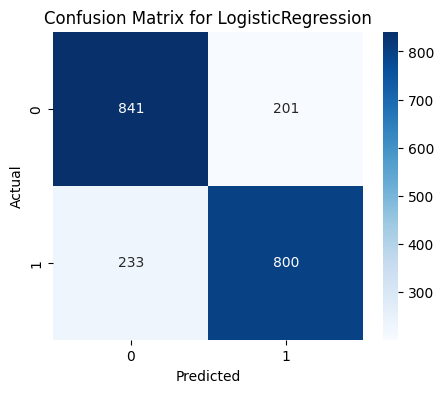


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      1042
         1.0       0.80      0.77      0.79      1033

    accuracy                           0.79      2075
   macro avg       0.79      0.79      0.79      2075
weighted avg       0.79      0.79      0.79      2075


Tuning: RandomForest
Fitting 3 folds for each of 12 candidates, totalling 36 fits


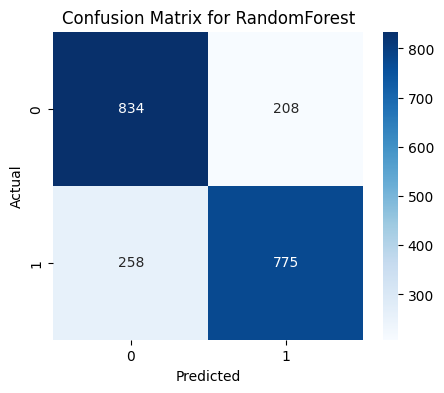


Classification Report for RandomForest:
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      1042
         1.0       0.79      0.75      0.77      1033

    accuracy                           0.78      2075
   macro avg       0.78      0.78      0.78      2075
weighted avg       0.78      0.78      0.78      2075


Tuning: XGBoost
Fitting 3 folds for each of 36 candidates, totalling 108 fits


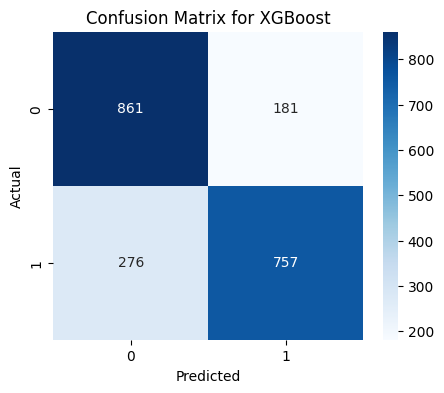


Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.79      1042
         1.0       0.81      0.73      0.77      1033

    accuracy                           0.78      2075
   macro avg       0.78      0.78      0.78      2075
weighted avg       0.78      0.78      0.78      2075


Model Performance after Hyperparameter Tuning:
                Model  Accuracy  F1 Score  \
0  LogisticRegression  0.790843  0.786627   
2             XGBoost  0.779759  0.768138   
1        RandomForest  0.775422  0.768849   

                                                                   Best Params  
0                                 {'C': 1, 'max_iter': 200, 'solver': 'lbfgs'}  
2  {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1}  
1             {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}  


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Define parameter grids
param_grids = {
    "LogisticRegression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs'],
        'max_iter': [200]
    },
    "RandomForest": {
        'n_estimators': [100, 300],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 300],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1]
    }
}

# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
}

# Results containers
best_models = {}
results = []

# Train each model using GridSearchCV
for name, model in models.items():
    print(f"\nTuning: {name}")
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grids[name],
                        scoring='accuracy',  # or 'f1'
                        cv=3,
                        verbose=1,
                        n_jobs=-1)

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "Best Params": grid.best_params_
    })

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {name}:")
    print(cr)

# Show results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["Accuracy", "F1 Score"], ascending=False)
print("\nModel Performance after Hyperparameter Tuning:")
print(results_df)

In [ ]:
model=LogisticRegression(C=1, max_iter= 200, solver='lbfgs')

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=200)

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))